<a href="https://colab.research.google.com/github/markste-in/collatz/blob/main/NN_Colab_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import tqdm

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Working with",device)

Working with cuda


In [4]:
class NN(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(1,800)
        self.b1 = nn.BatchNorm1d(800)
        self.fc2 = nn.Linear(800,800)
        self.b22 = nn.BatchNorm1d(800)
        self.fc22 = nn.Linear(800,400)
        self.b2 = nn.BatchNorm1d(400)
        self.fc3 = nn.Linear(400, 1)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.b1(x)
        x = F.relu(self.fc2(x))
        x = self.b22(x)
        x = F.relu(self.fc22(x ))
        x = self.b2(x)
        x = self.fc3(x)

        return x

def collatz_iter(n : int) -> int:
    iter = 0
    while (n>1):
        if n%2 == 0:
            n =n / 2
        else:
            n = n*3+1
        iter+=1
    return iter


In [5]:
PATH =  "gdrive/MyDrive/collatz_model.pt"

In [11]:
batch_size = 32
model = NN().to(device)
opt = torch.optim.Adam(params=model.parameters(),lr = 0.1)
losses = list()


In [12]:
try:
  model.load_state_dict(torch.load(PATH,map_location=torch.device(device)))
  print("Previous model loaded")
except:
  print("No old model found. Train from scratch")

No old model found. Train from scratch


In [13]:
for i in tqdm.tqdm(range(100000)):
    x = torch.randint(1, 1000000000000000, (batch_size, 1))
    y = x.clone().float().apply_(collatz_iter).to(device)
    x = x.float().to(device)

    opt.zero_grad()
    pred = model(x)
    loss = ((y-pred)**2).sum()
    loss.backward()
    losses.append(loss.cpu().detach().numpy())
    opt.step()
    if i%500 ==0:
      torch.save(model.state_dict(), PATH)

100%|██████████| 100000/100000 [07:03<00:00, 235.91it/s]


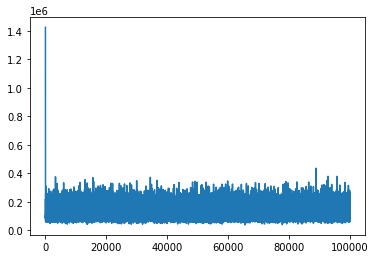

In [15]:
plt.plot(losses)
#plt.yscale("log")
plt.show()